In [1]:
using LinearAlgebra
include("readclassjson.jl")
data = readclassjson("tomodata.json")

Dict{Any,Any} with 4 entries:
  "w" => 40
  "L" => [0.0 -20.0; 0.0 -19.5; … ; 2.96706 19.5; 2.96706 20.0]
  "h" => 45
  "y" => [17.7, 16.3, 21.4, 14.1, 18.0, 12.7, 18.8, 15.0, 30.7, 25.6  …  30.0, …

In [2]:
w = data["w"]
L = data["L"]
h = data["h"]
y = data["y"]

6966-element Array{Float64,1}:
 17.7
 16.3
 21.4
 14.1
 18.0
 12.7
 18.8
 15.0
 30.7
 25.6
 35.8
 32.0
 39.9
  ⋮
 38.6
 35.0
 30.0
 24.8
 19.9
 17.2
 16.2
 16.6
 16.2
 17.6
 18.3
 16.8

In [3]:
size(y)

(6966,)

In [4]:
function check_function(i, theta, d)
    return (((1 - (w / 2)) * sin(theta)) - ((i - (h / 2)) * cos(theta)) - d)
end

check_function (generic function with 1 method)

In [5]:
function A_row(n)
    A = zeros(w * h)
    theta = L[n, 1]
    d = L[n,2]
    i = 1
    while i <= h
        j = 1
        check = check_function(i, theta, d)
        sinθ = sin(theta)
        while j <= w
            if abs(check) >= 2
                A[i + (45*j) - 45] = 0
            else
                A[i + (45*j) - 45] = 1
            end
            j += 1
            check += sinθ
        end
        i += 1
    end
    return A
end

A_row (generic function with 1 method)

Now, that we can construct each row of A from Ln1 and Ln2, we can find P(n) and Q(n) recurisvely and then evaluate the estimated value of x.

In [6]:
μ = 0.10

function P(k)
    if k == 0
        return (μ * I(h * w))
    end
    a = A_row(k)
    aT = transpose(a)
    return (P(k - 1) + (a * aT))
end

function q(k)
    if k == 0
        return (zeros(h*w))
    end
    a = A_row(k)
    return (q(k - 1) + ((y[k]) * a))
end

q (generic function with 1 method)

In [7]:
function estimate_X(k)
    return (reshape(inv(P(k)) * q(k) , h , w))
end

estimate_X (generic function with 1 method)

In [8]:
estimate_X(6)

45×40 Array{Float64,2}:
 0.0        0.0        0.0        …  0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0        …  0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0        …  0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 ⋮                                ⋱                        
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0        

In [9]:
using Plots

In [10]:
function plot_X(k)
    name = string("k = " , string(k))
    X = estimate_X(k)
    heatmap(X, yflip=true, aspect_ratio=:equal, color=:gist_gray, cbar=:none, framestyle=:none, title=name)
end

plot_X (generic function with 1 method)

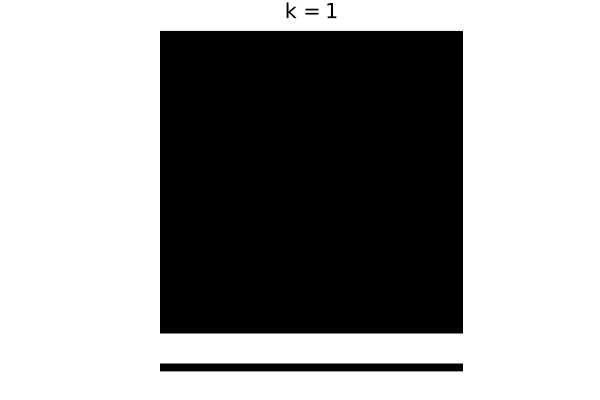

In [11]:
plot_X(1)

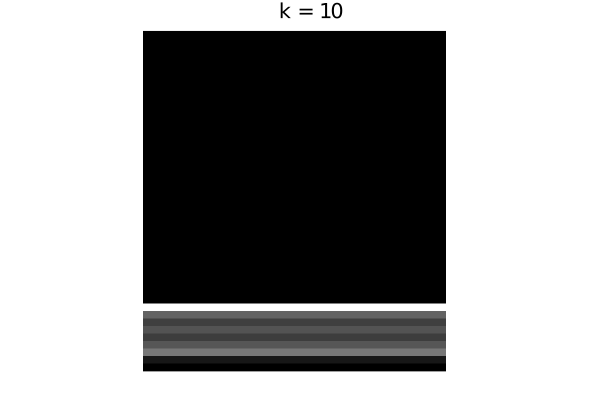

In [73]:
plot_X(10)

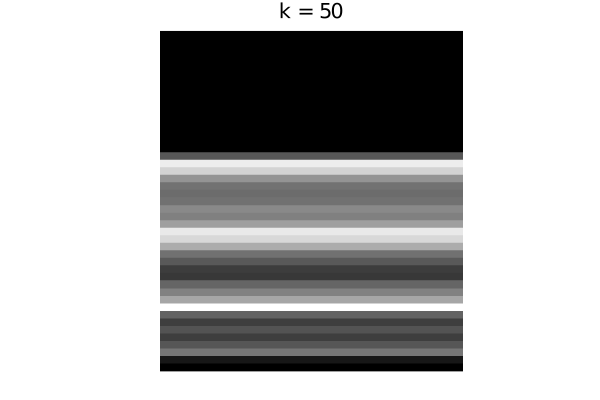

In [59]:
plot_X(50)

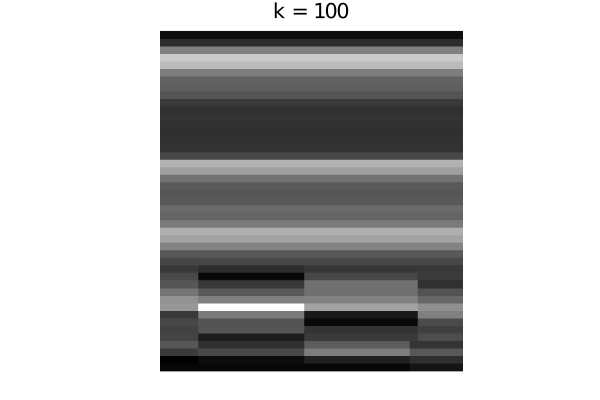

In [60]:
plot_X(100)

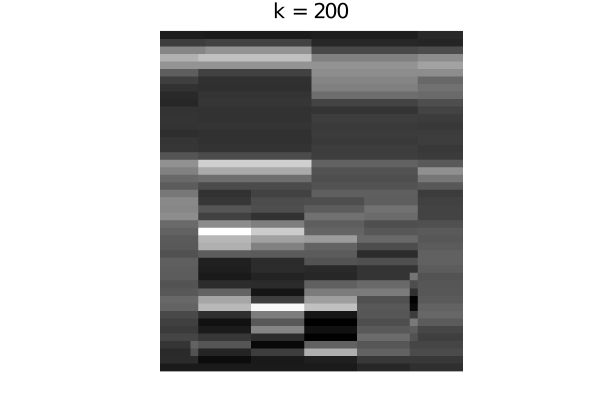

In [61]:
plot_X(200)

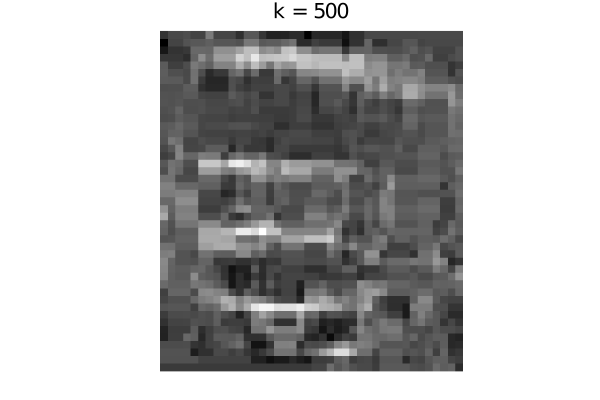

In [62]:
plot_X(500)

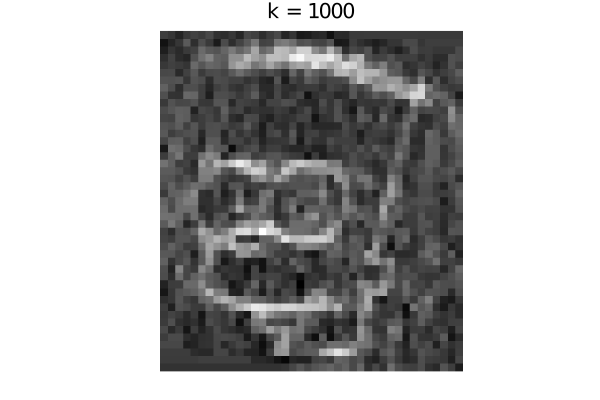

In [63]:
plot_X(1000)

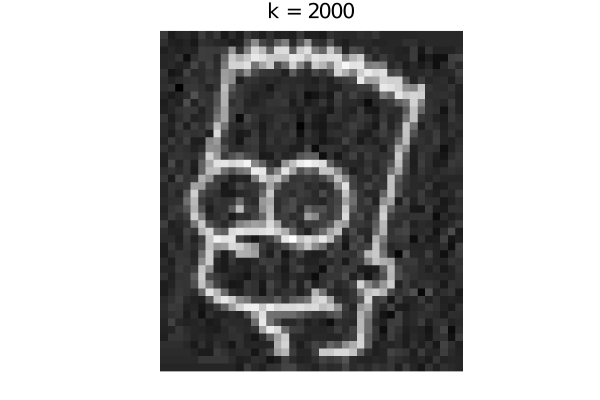

In [64]:
plot_X(2000)

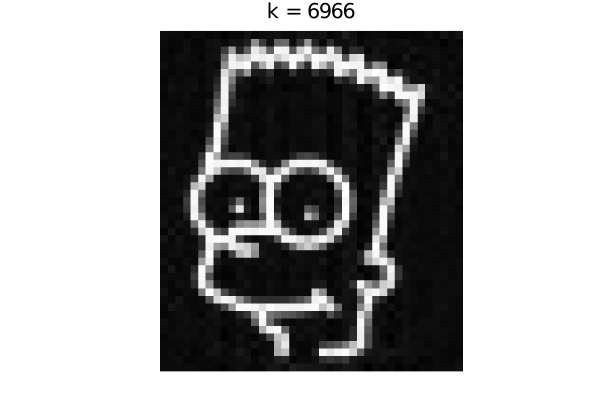

In [65]:
plot_X(6966)